In [1]:
using DataFrames
using Gadfly
using Compose
set_default_plot_size(30cm, 12cm)

In [15]:
function WeightedHist(in_vec, in_bins, in_weight, density = false)
    # Safety check    
    if length(in_vec) != length(in_weight)
        println("Each element of the input vector needs one weight")
        return
    end
    
    # Prepare variables
    out_counts = Array{Float64}(length(in_bins)-1)
    
    # Get weighted histogram
    for i=1:length(in_bins)-1
        temp_bool = (in_vec .>= in_bins[i]) .& (in_vec .< in_bins[i+1])
        out_counts[i] = sum(in_weight[temp_bool])
    end
    
    # Get bins middle points
    out_middle = (in_bins[1:end-1] + in_bins[2:end]) / 2
    
    # Turn counts into density
    if (density == true)
        out_counts = out_counts ./ sum(out_counts) 
    end
    return out_counts, out_middle
end

WeightedHist (generic function with 2 methods)

# LF

### production

In [4]:
# Energies
dir_lf_pdt = "/home/german/labo/17/2pdz/run/lf"
lf_pdt_Ek = readdlm("$dir_lf_pdt/data/outputs/ektot.dat");
lf_pdt_Ep = readdlm("$dir_lf_pdt/data/outputs/eptot.dat");
lf_pdt_Etot = readdlm("$dir_lf_pdt/data/outputs/etot.dat");
df_lf_PDT_E = DataFrame(E=[lf_pdt_Ek[:, 2]; lf_pdt_Ep[:, 2]; lf_pdt_Etot[:, 2]],
NSTEP=[lf_pdt_Ek[:, 1]; lf_pdt_Ep[:, 1]; lf_pdt_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(lf_pdt_Ek[:, 1])]));

# Temperature
lf_pdt_T = readdlm("$dir_lf_pdt/data/outputs/temp.dat");
df_lf_PDT_T = DataFrame(Temperature=lf_pdt_T[:, 2],
NSTEP=lf_pdt_T[:, 1]);

# RMSD 
lf_pdt_rmsd = readdlm("$dir_lf_pdt/data/rmsd_lf");
df_lf_PDT_RMSD = DataFrame(RMSD=lf_pdt_rmsd[:, 2], Frame=lf_pdt_rmsd[:, 1]);

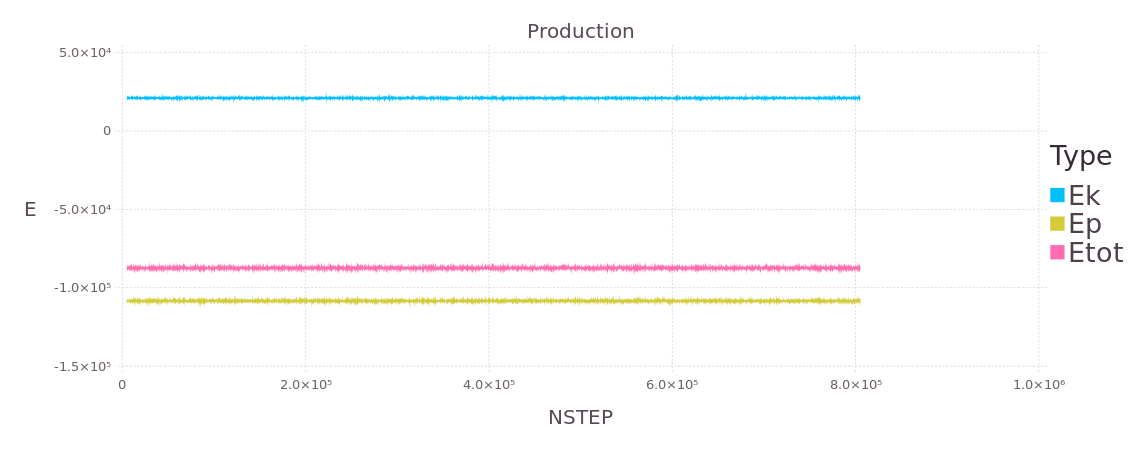

In [5]:
plot(df_lf_PDT_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

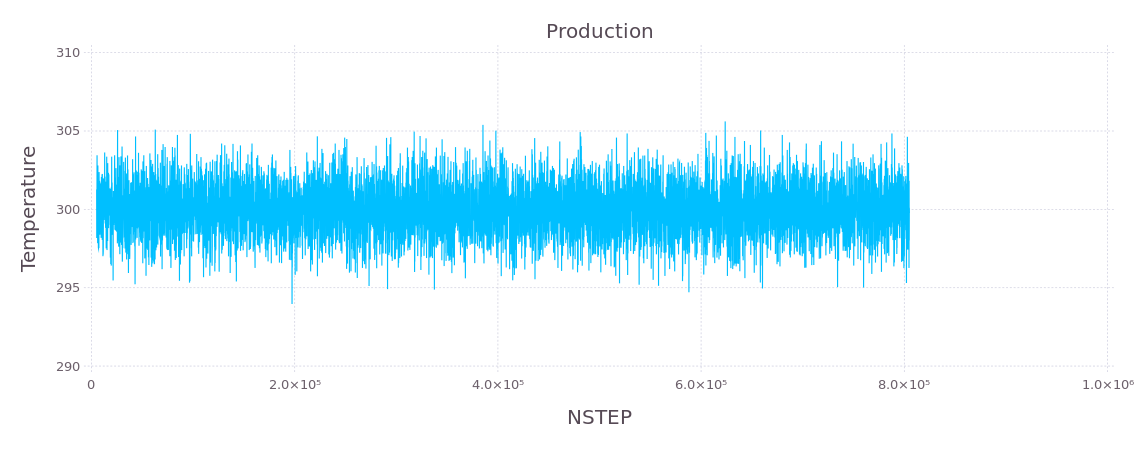

In [6]:
plot(df_lf_PDT_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

### RMSD without loops (resids 12-112)

In [7]:
pdf_lf_PDT_RMSD = plot(df_lf_PDT_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Production"),
Guide.annotation(compose(compose(context(), text(70000, 1.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

# LB

### production

In [4]:
# Energies
dir_lb_pdt = "/home/german/labo/17/2pdz/run/lb"
lb_pdt_Ek = readdlm("$dir_lb_pdt/data/outputs/ektot.dat");
lb_pdt_Ep = readdlm("$dir_lb_pdt/data/outputs/eptot.dat");
lb_pdt_Etot = readdlm("$dir_lb_pdt/data/outputs/etot.dat");
df_lb_PDT_E = DataFrame(E=[lb_pdt_Ek[:, 2]; lb_pdt_Ep[:, 2]; lb_pdt_Etot[:, 2]],
NSTEP=[lb_pdt_Ek[:, 1]; lb_pdt_Ep[:, 1]; lb_pdt_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(lb_pdt_Ek[:, 1])]));

# Temperature
lb_pdt_T = readdlm("$dir_lb_pdt/data/outputs/temp.dat");
df_lb_PDT_T = DataFrame(Temperature=lb_pdt_T[:, 2],
NSTEP=lb_pdt_T[:, 1]);

# RMSD
lb_pdt_rmsd = readdlm("$dir_lb_pdt/data/rmsd_lb");
df_lb_PDT_RMSD = DataFrame(RMSD=lb_pdt_rmsd[:, 2], Frame=lb_pdt_rmsd[:, 1]);

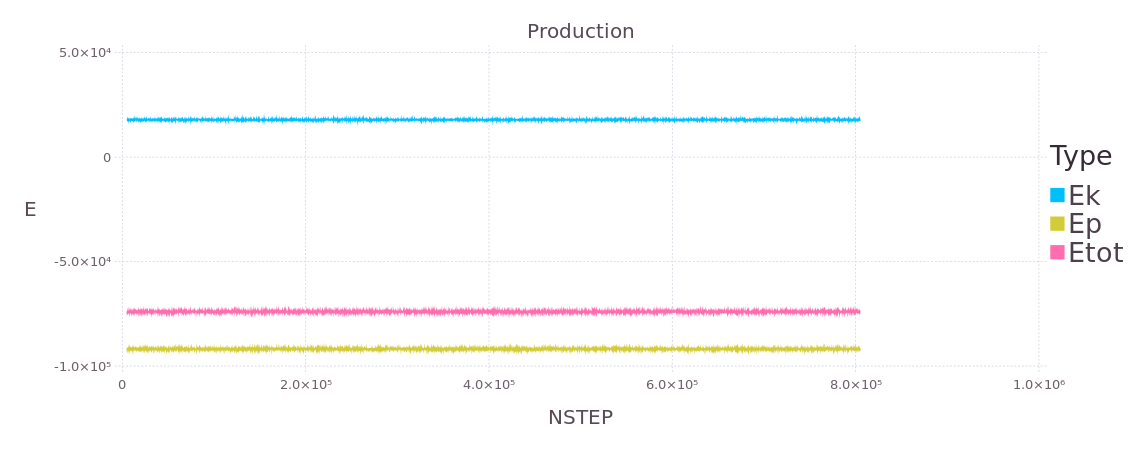

In [5]:
plot(df_lb_PDT_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

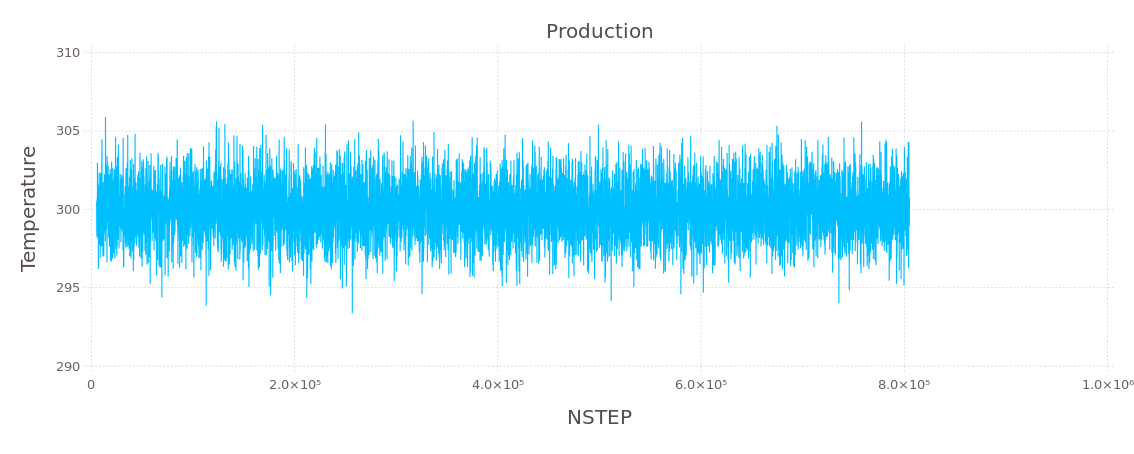

In [6]:
plot(df_lb_PDT_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

### RMSD without loops (resids 12-112)

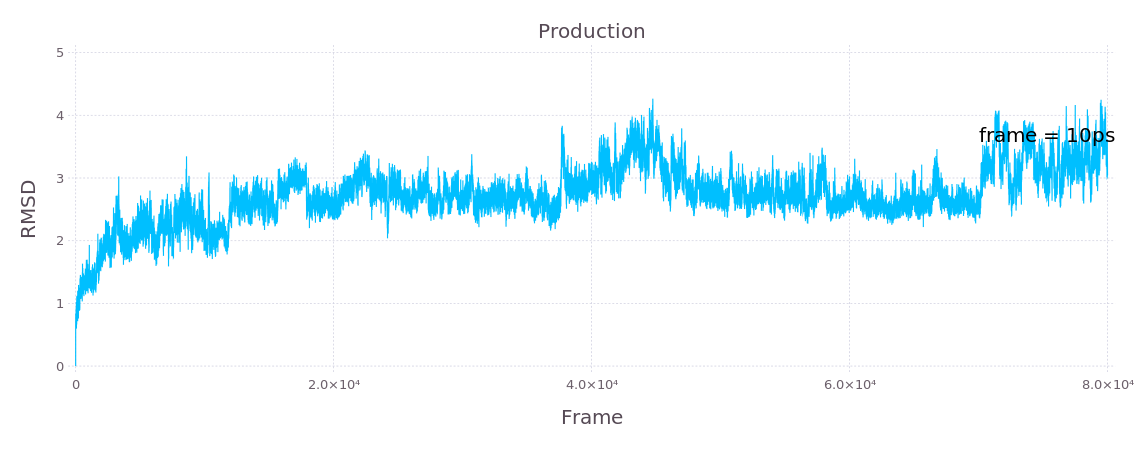

In [7]:
pdf_lb_PDT_RMSD = plot(df_lb_PDT_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Production"),
Guide.annotation(compose(compose(context(), text(70000, 3.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## Check distances between constrained atoms

In [13]:
# Read the distances
tmp = readdlm("$dir_lb_pdt/data/distance")[:, 2:end]

# Compile into data frames
df_2076_47 = DataFrame(Frame = df_lb_PDT_RMSD[:, 2],  Distance = tmp[:, 1])
df_2076_460 = DataFrame(Frame = df_lb_PDT_RMSD[:, 2],  Distance = tmp[:, 2])
df_2016_543 = DataFrame(Frame = df_lb_PDT_RMSD[:, 2],  Distance = tmp[:, 3]);

In [16]:
bins = collect(1.5:0.1:4.5)

hist_2076_47, bins_2076_47 = WeightedHist(Array(df_2076_47[:, 2]), 
    bins, repeat([1], inner = [length(df_2076_47[:, 2])]), true)
df_hist_2076_47 = DataFrame(Probability = hist_2076_47, Distance = bins_2076_47);

hist_2076_460, bins_2076_460 = WeightedHist(Array(df_2076_460[:, 2]),
    bins, repeat([1], inner = [length(df_2076_460[:, 2])]), true)
df_hist_2076_460 = DataFrame(Probability = hist_2076_460, Distance = bins_2076_460);

hist_2016_543, bins_2016_543 = WeightedHist(Array(df_2016_543[:, 2]),
    bins, repeat([1], inner = [length(df_2016_543[:, 2])]), true)
df_hist_2016_543 = DataFrame(Probability = hist_2016_543, Distance = bins_2016_543);

## Distance between VAL132@OXT - GLY30@H // 2076 - 479

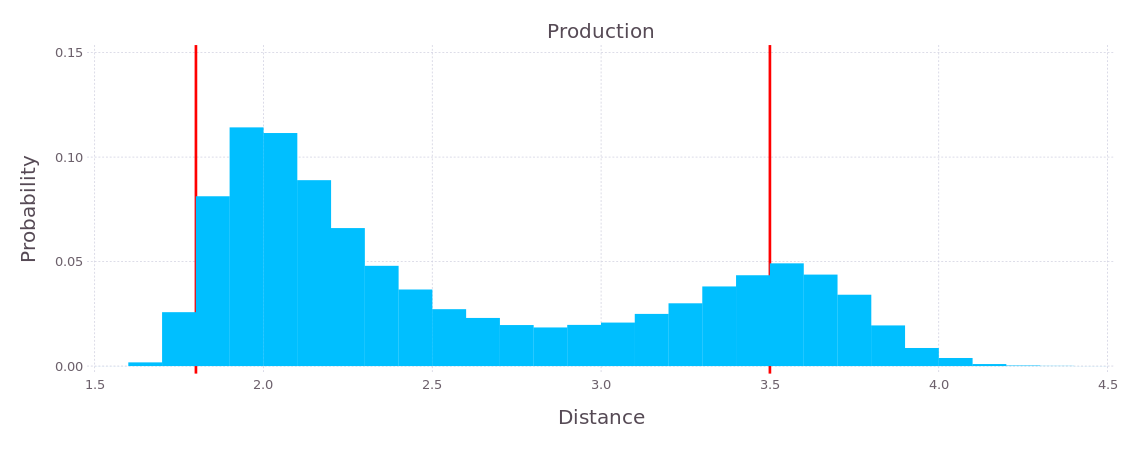

In [17]:
# Plot 
pdf_2076_47 = plot(df_hist_2076_47, Geom.bar, x="Distance", y="Probability",
Guide.title("Production"), 

xintercept = [ 1.8 ; 3.5 ], Geom.vline(color = "red"),     
Coord.cartesian(xmin = 1.5, xmax = 4.5),
    
Guide.annotation(compose(compose(context(), text(70000, 0.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, line_width = 2pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## Distance between VAL132@OXT - LEU29@H // 2016 - 460

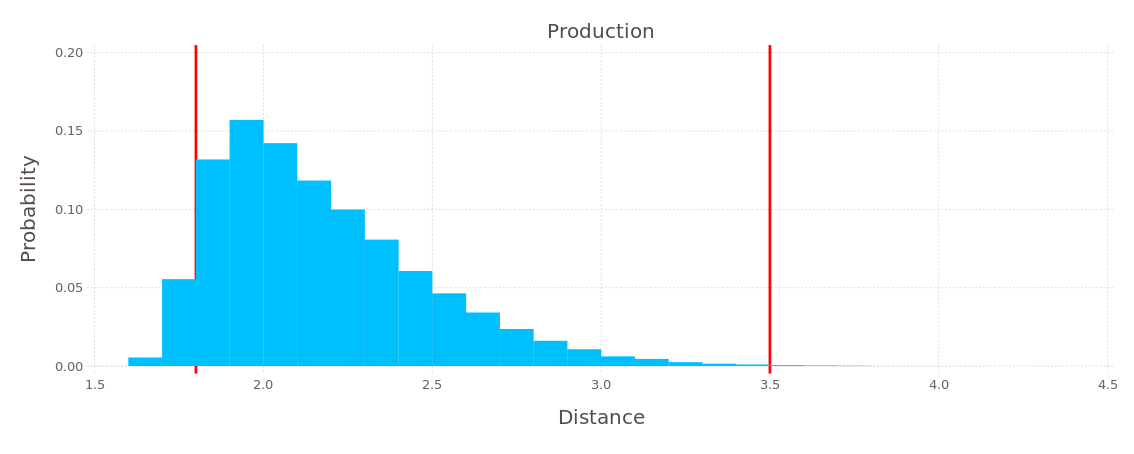

In [18]:
# Plot 
pdf_2076_460 = plot(df_hist_2076_460, Geom.bar, x="Distance", y="Probability",
Guide.title("Production"),
    
xintercept = [ 1.8 ; 3.5 ], Geom.vline(color = "red"),     
Coord.cartesian(xmin = 1.5, xmax = 4.5),    
    
Guide.annotation(compose(compose(context(), text(70000, 0.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, line_width = 2pt, 
key_title_font_size=20pt, key_label_font_size=20pt))

## Distance between LEU128@O - GLY35@H // 2016 - 543

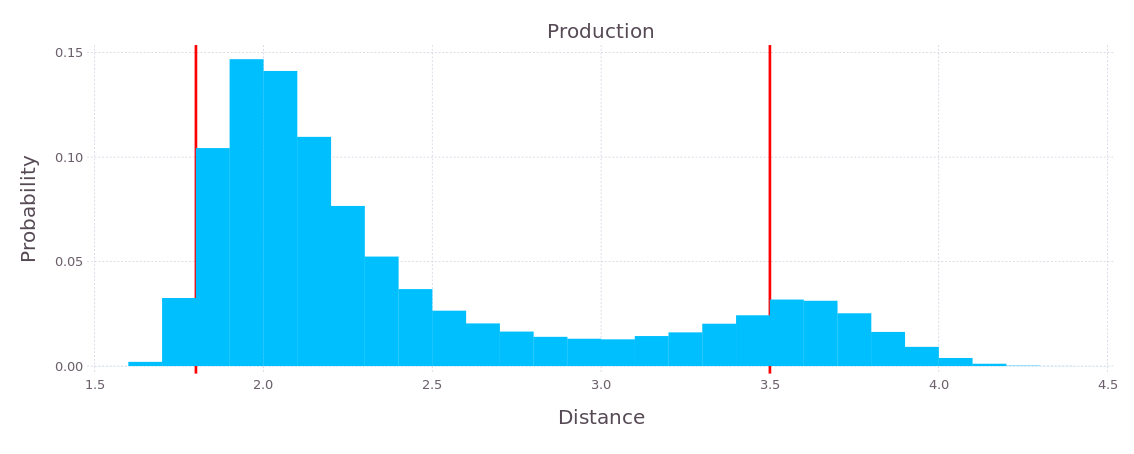

In [19]:
# Plot 
pdf_2016_543 = plot(df_hist_2016_543, Geom.bar, x="Distance", y="Probability",
Guide.title("Production"),
    
xintercept = [ 1.8 ; 3.5 ], Geom.vline(color = "red"),     
Coord.cartesian(xmin = 1.5, xmax = 4.5),
    
Guide.annotation(compose(compose(context(), text(70000, 4.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, line_width = 2pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## Check distances between Calphas from aminoacids with constrained atoms after the Tjump, during the long run (NEQ run salida de production run de 800ns con restraints)

In [16]:
# Read the distances
frame1_d1 = readdlm("$dir_lb_pdt/neq/data/larga_4/distances_after_Tjump/1d1")[:, 2:end]
frame1_d2 = readdlm("$dir_lb_pdt/neq/data/larga_4/distances_after_Tjump/1d2")[:, 2:end]
frame1_d3 = readdlm("$dir_lb_pdt/neq/data/larga_4/distances_after_Tjump/1d3")[:, 2:end]

frame200_d1 = readdlm("$dir_lb_pdt/neq/data/larga_4/distances_after_Tjump/200d1")[:, 2:end]
frame200_d2 = readdlm("$dir_lb_pdt/neq/data/larga_4/distances_after_Tjump/200d2")[:, 2:end]
frame200_d3 = readdlm("$dir_lb_pdt/neq/data/larga_4/distances_after_Tjump/200d3")[:, 2:end]

frame400_d1 = readdlm("$dir_lb_pdt/neq/data/larga_4/distances_after_Tjump/400d1")[:, 2:end]
frame400_d2 = readdlm("$dir_lb_pdt/neq/data/larga_4/distances_after_Tjump/400d2")[:, 2:end]
frame400_d3 = readdlm("$dir_lb_pdt/neq/data/larga_4/distances_after_Tjump/400d3")[:, 2:end]


# Compile into data frames
df_d1 = DataFrame(Frame = repeat([ "Frame 1" ; "Frame 2" ; "Frame 3" ], inner = [length(frame1_d1)]),
    NSTEP = repeat(collect(1:length(frame1_d1)), outer = [3]),
    Distance = reshape([ frame1_d1 ; frame200_d1 ; frame400_d1 ], length(frame1_d1) * 3))

df_d2 = DataFrame(Frame = repeat([ "Frame 1" ; "Frame 2" ; "Frame 3" ], inner = [length(frame1_d2)]),
    NSTEP = repeat(collect(1:length(frame1_d2)), outer = [3]),
    Distance = reshape([ frame1_d2 ; frame200_d2 ; frame400_d2 ], length(frame1_d1) * 3))

df_d3 = DataFrame(Frame = repeat([ "Frame 1" ; "Frame 2" ; "Frame 3" ], inner = [length(frame1_d3)]),
    NSTEP = repeat(collect(1:length(frame1_d3)), outer = [3]),
    Distance = reshape([ frame1_d3 ; frame200_d3 ; frame400_d3 ], length(frame1_d1) * 3));

### 20 - 132

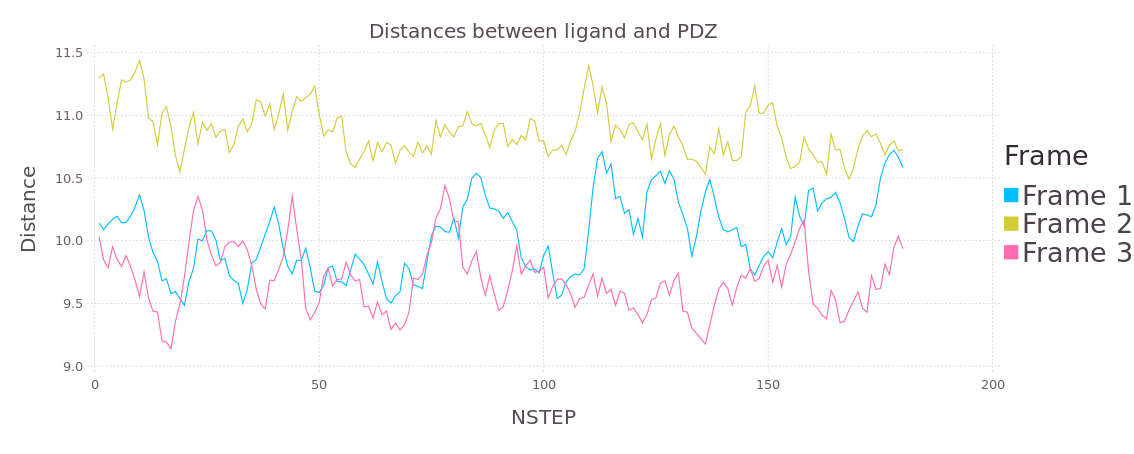

In [17]:
plot(df_d1, Geom.line, x="NSTEP", y="Distance", color="Frame",
Guide.title("Distances between ligand and PDZ"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

### 39 - 126

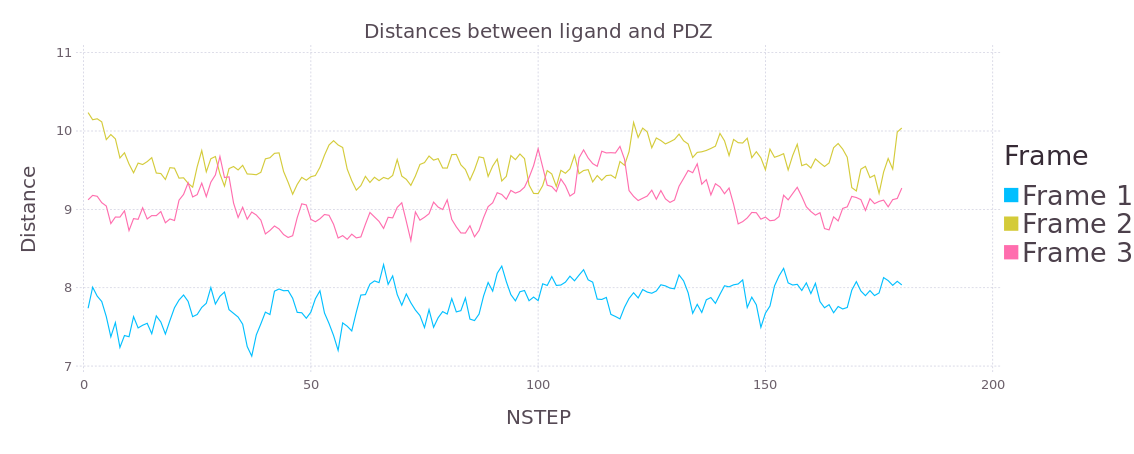

In [18]:
plot(df_d2, Geom.line, x="NSTEP", y="Distance", color="Frame",
Guide.title("Distances between ligand and PDZ"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

### 40 - 124

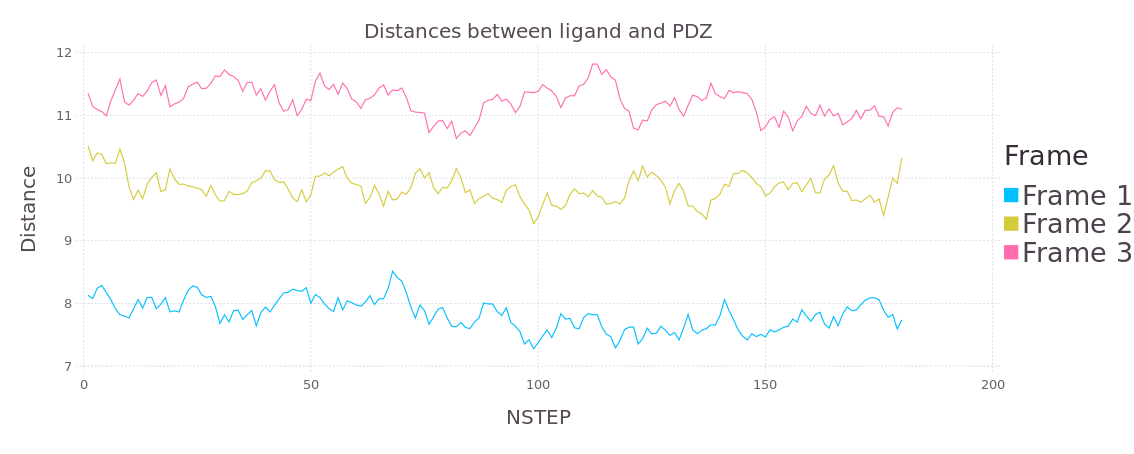

In [19]:
plot(df_d3, Geom.line, x="NSTEP", y="Distance", color="Frame",
Guide.title("Distances between ligand and PDZ"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        